<a href="https://colab.research.google.com/github/LachlanMountjoy/EE695Project/blob/main/SVM_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!git clone https://github.com/LachlanMountjoy/EE695Project.git

fatal: destination path 'EE695Project' already exists and is not an empty directory.


In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('/content/EE695Project/diabetes.csv')  
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
data['Glucose'][data['Glucose'] == 0] = data['Glucose'].median()
data['BloodPressure'][data['BloodPressure'] == 0] = data['BloodPressure'].median()
data['SkinThickness'][data['SkinThickness'] == 0] = data['SkinThickness'].median()
data['BMI'][data['BMI'] == 0] = data['BMI'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [146]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
acc_linear = accuracy_score(y_test, y_predict)
print(f'The accuracy for the SVM classifier is {acc_linear}.')

The accuracy for the SVM classifier is 0.7987012987012987.


In [148]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_predict)
print(f'The accuracy for the SVM classifier is {acc_rbf}.')

The accuracy for the SVM classifier is 0.7727272727272727.


In [149]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
acc_sigmoid = accuracy_score(y_test, y_predict)
print(f'The accuracy for the SVM classifier is {acc_sigmoid}.')

The accuracy for the SVM classifier is 0.7402597402597403.


In [150]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
acc_poly = accuracy_score(y_test, y_predict)
print(f'The accuracy for the SVM classifier is {acc_poly}.')

The accuracy for the SVM classifier is 0.7337662337662337.


In [151]:
data = {'Kernels':['linear', 'rbf', 'sigmoid', 'poly'],
        'Accuracy':[acc_linear, acc_rbf, acc_sigmoid, acc_poly]}
pd.DataFrame(data)

,Kernels,Accuracy
0,linear,0.798701
1,rbf,0.772727
2,sigmoid,0.740260
3,poly,0.733766


The accuracy for the SVM classifier with 1 nearest neighbors is 0.7338.
The accuracy for the SVM classifier with 2 nearest neighbors is 0.7468.
The accuracy for the SVM classifier with 3 nearest neighbors is 0.7468.
The accuracy for the SVM classifier with 4 nearest neighbors is 0.7727.
The accuracy for the SVM classifier with 5 nearest neighbors is 0.7857.
The accuracy for the SVM classifier with 6 nearest neighbors is 0.7922.
The accuracy for the SVM classifier with 7 nearest neighbors is 0.8052.
The accuracy for the SVM classifier with 8 nearest neighbors is 0.8052.
The accuracy for the SVM classifier with 9 nearest neighbors is 0.8117.
The accuracy for the SVM classifier with 10 nearest neighbors is 0.8182.
The accuracy for the SVM classifier with 11 nearest neighbors is 0.8117.
The accuracy for the SVM classifier with 12 nearest neighbors is 0.8247.
The accuracy for the SVM classifier with 13 nearest neighbors is 0.8182.
The accuracy for the SVM classifier with 14 nearest neighbor

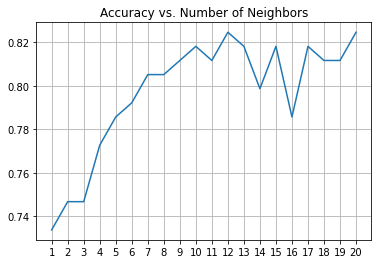

In [163]:
n_neighbors = [x for x in range(1, 21)]
knn_results = []

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  y_predict = knn.predict(X_test)
  acc_knn = accuracy_score(y_test, y_predict)
  print(f'The accuracy for the SVM classifier with {i} nearest neighbors is {acc_knn:.4f}.')
  knn_results.append(acc_knn)

print()
plt.figure()
plt.plot(n_neighbors, knn_results)
plt.xticks(ticks=n_neighbors, labels=n_neighbors)
plt.title("Accuracy vs. Number of Neighbors")
plt.grid()
plt.show()